<a href="https://colab.research.google.com/github/ilhamydn17/2141720091-MachLearn-2023/blob/week-11/Tugas_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1
#### Deskripsi
Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

##### Note:
Pada langkah ini saya mencoba menggunakan strategi *data augmentation* yang akan diterapkan pada CNN dengan data CIFAR-10 tersebut.

### Import Library

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [15]:
# Load CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

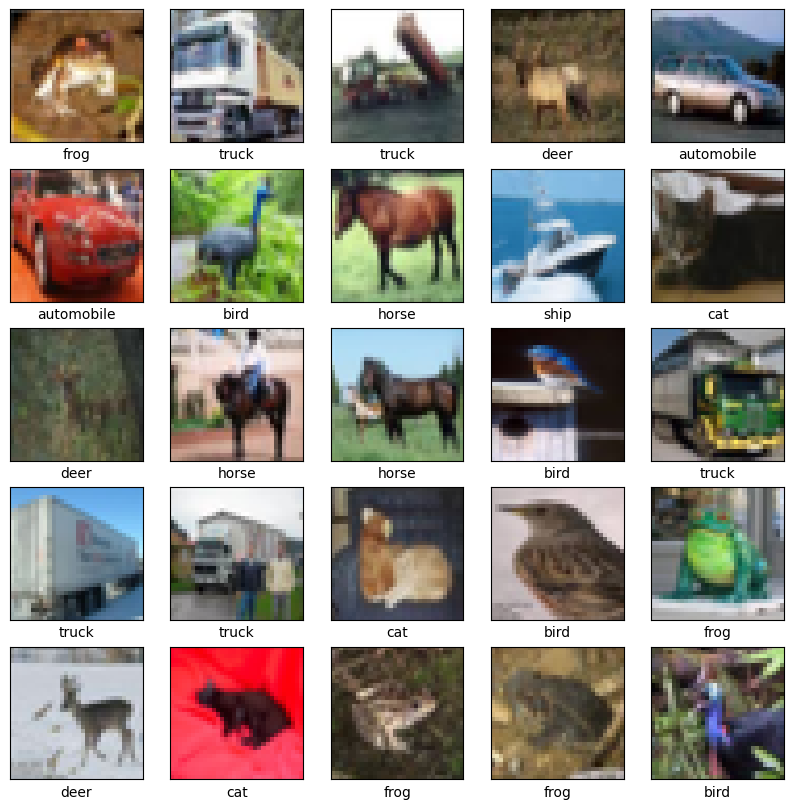

In [16]:
# Visualize image data from CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Normalize Data

In [17]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Building Model and Compile

In [40]:
# initiate model
model = Sequential()

In [41]:
# add layer to model
# First Conv layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Second Conv layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third, fourth, fifth convolution layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [42]:
# compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fitting Model

In [43]:
history = model.fit(train_images, train_labels, epochs=20,validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 34s 20ms/step - loss: 2.5204 - accuracy: 0.2995 - val_loss: 1.8801 - val_accuracy: 0.4836
Epoch 2/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7499 - accuracy: 0.5007 - val_loss: 1.5212 - val_accuracy: 0.5769
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4663 - accuracy: 0.5901 - val_loss: 1.2803 - val_accuracy: 0.6486
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2801 - accuracy: 0.6483 - val_loss: 1.1441 - val_accuracy: 0.6893
Epoch 5/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1573 - accuracy: 0.6857 - val_loss: 1.0544 - val_accuracy: 0.7174
Epoch 6/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0618 - accuracy: 0.7163 - val_loss: 0.9844 - val_accuracy: 0.7402
Epoch 7/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9882 - accuracy: 0.7405 - val_loss: 0.9141 -

### Evaluate Model

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

313/313 - 2s - loss: 0.7890 - accuracy: 0.8196 - 2s/epoch - 5ms/step

Test accuracy: 81.96%


313/313 - 2s - loss: 0.7890 - accuracy: 0.8196 - 2s/epoch - 5ms/step


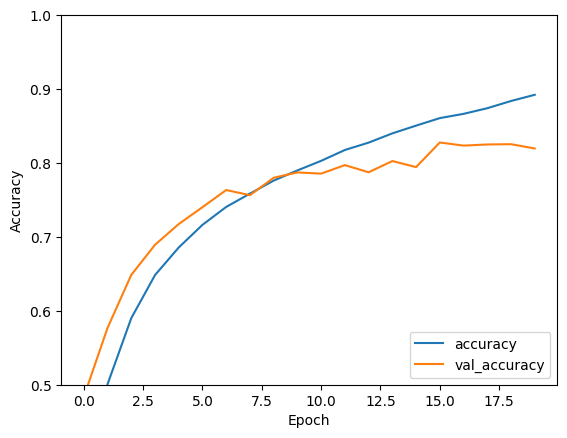

In [45]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Import Library

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

In [ ]:
# get MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


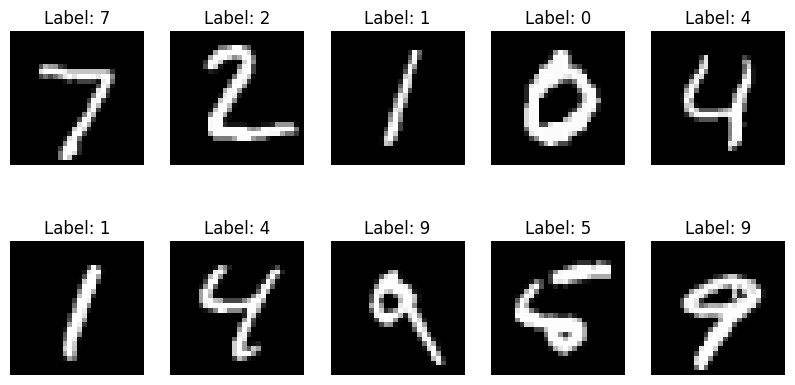

In [ ]:
# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.show()

### Data Preprocessing

In [ ]:
# Check for nan values
print(np.isnan(X_train).any())
print(np.isnan(X_test).any())

False
False


In [ ]:
# Normalization and reshaping
input_shape = (28, 28, 1)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test / 255.0

In [ ]:
# Label Encoding (one hot encoding)

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

### Building Model CNN

In [ ]:
# Define model CNN
batch = 64
num_class = 10
epochs = 10


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# Menambahkan custom callback
# Berguna untuk menghentikan training data ketika akurasi telah tercapai 90% persen saat training
# Meski training masih belum selesai hingga epoch yang telah ditentukan, namun jika akurasi telah memenuhi target training akan dihentikan
class customCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.995):
      print('akurasi telah tercapai 99.5%, training dihentikan...')
      self.model.stop_training = True

callbacks = customCallback()


In [ ]:
# Fitting Model
history = model.fit(X_train, y_train,
                    batch_size = batch,
                    epochs = epochs,
                    validation_split = 0.1,
                    callbacks = [callbacks]
                    )

Epoch 1/10
844/844 [==============================] - 18s 8ms/step - loss: 0.2203 - acc: 0.9313 - val_loss: 0.0456 - val_acc: 0.9863
Epoch 2/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0751 - acc: 0.9780 - val_loss: 0.0355 - val_acc: 0.9900
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0580 - acc: 0.9834 - val_loss: 0.0331 - val_acc: 0.9898
Epoch 4/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0473 - acc: 0.9864 - val_loss: 0.0320 - val_acc: 0.9910
Epoch 5/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0427 - acc: 0.9878 - val_loss: 0.0382 - val_acc: 0.9923
Epoch 6/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0414 - acc: 0.9886 - val_loss: 0.0265 - val_acc: 0.9938
Epoch 7/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0381 - acc: 0.9889 - val_loss: 0.0346 - val_acc: 0.9930
Epoch 8/10
844/844 [==============================] - 6s 7ms/step - loss: 0

### Evaluate Model

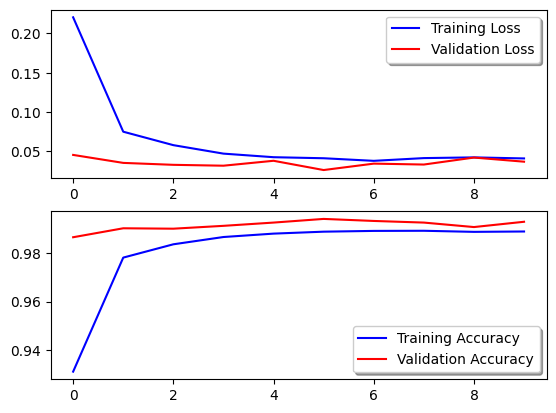

In [ ]:
# Loss and Accuracy
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Prediction
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0260 - acc: 0.9925


In [ ]:
# Confussion Matrix
# predict from testing dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_class = np.argmax(y_pred,axis = 1)
# Convert testing observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_class)

313/313 [==============================] - 1s 2ms/step


<Axes: >

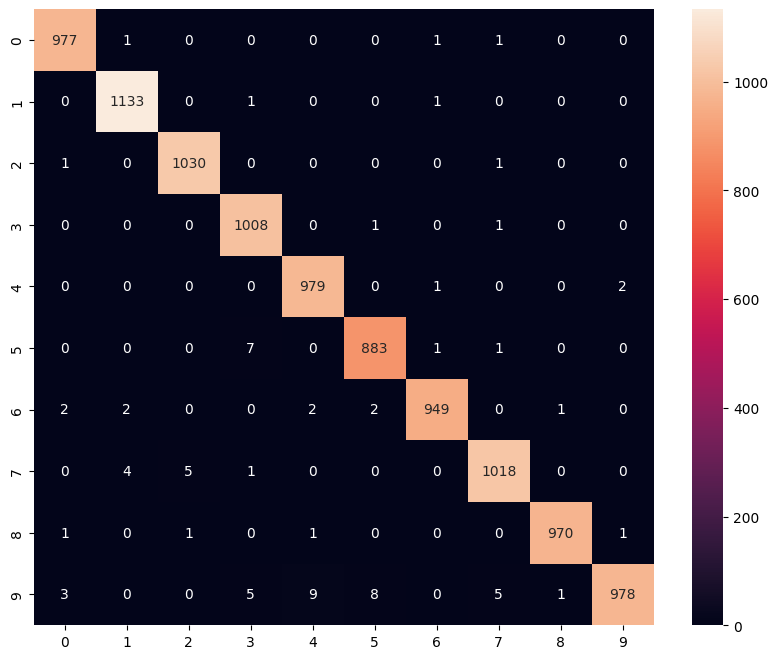

In [ ]:
# visualisaztion confussion matrix with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

1/1 [==============================] - 0s 17ms/step


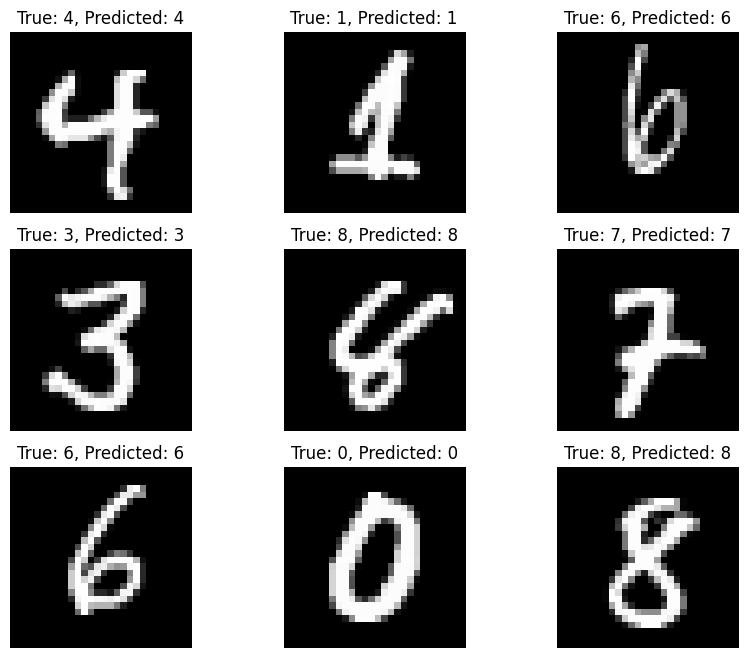

In [ ]:
# testing to prediction image

# Choose 9 random indices from the test set
indices = np.random.choice(len(X_test), size=9, replace=False)

# Plot the 9 images
plt.figure(figsize=(10, 8))
for i, index in enumerate(indices, 1):
    plt.subplot(3, 3, i)

    # Get the image and true label
    test_image = X_test[index]
    true_label = np.argmax(y_test[index])

    # Reshape the image to (1, 28, 28, 1) to match the input shape of the model
    test_image = np.expand_dims(test_image, axis=0)

    # Get the model prediction
    prediction = model.predict(test_image)
    predicted_label = np.argmax(prediction)

    # Display the true label, predicted label, and the image
    plt.imshow(test_image[0, :, :, 0], cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')

plt.show()
